<a href="https://colab.research.google.com/github/ahmedjajan93/COVID-19-Case-Data-Analysis-Problem/blob/main/COVID_19_Case_Data_Analysis_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The following link provides the data :**

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

 **Analysis of this data should answer the following questions :**

* What is the daily infection and death rate worldwide?
* What is the daily infection and death rate by country?
* What is the total number of infections and deaths per month worldwide?
* What is the total number of infections and deaths per month per country?
* What are the top five countries in terms of the number of deaths and infections?

**Data Exploration and Cleaning :**

In [1]:
# Import library
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [3]:
df.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61899,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,61900.0,1.562893e+01,8.841582e+00,1.000000,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
month,61900.0,7.067157e+00,2.954776e+00,1.000000,5.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
year,61900.0,2.019999e+03,3.288217e-02,2019.000000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
cases,61900.0,1.155147e+03,6.779224e+03,-8261.000000,0.000000e+00,1.500000e+01,2.730000e+02,2.346330e+05
deaths,61900.0,2.605546e+01,1.312271e+02,-1918.000000,0.000000e+00,0.000000e+00,4.000000e+00,4.928000e+03
popData2019,61777.0,4.098770e+07,1.531294e+08,815.000000,1.293120e+06,7.169456e+06,2.851583e+07,1.433784e+09
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,59021.0,6.632059e+01,1.623292e+02,-147.419587,7.575262e-01,6.724045e+00,5.257272e+01,1.900836e+03


In [5]:
# Delete some columns
df.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000','geoId','countryterritoryCode','continentExp','dateRep'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61777 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [7]:
# Display missing values
df.isnull().sum()

,0
day,0
month,0
year,0
cases,0
deaths,0
countriesAndTerritories,0
popData2019,123


**Note :** We have 123 missing values in the **popData2019** column.
To remove the missing values, there are many available methods and options. In our case, we cannot delete the records that contain missing values in the **population statistics** column. This is because there is important data in those records, which is related to the number of infections and deaths in some countries.

In [8]:
# Replacing missing values with zero
df['popData2019'].fillna(0,inplace=True)

<ipython-input-8-31179e231c12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['popData2019'].fillna(0,inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61900 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [10]:
df.isnull().sum()/len(df)*100

,0
day,0.0
month,0.0
year,0.0
cases,0.0
deaths,0.0
countriesAndTerritories,0.0
popData2019,0.0


In [11]:
# Display missing values
df.isna().any()

,0
day,False
month,False
year,False
cases,False
deaths,False
countriesAndTerritories,False
popData2019,False


In [12]:
# Display duplicated columns
print(df.duplicated().sum())

0


In [13]:
# Change popData2019 values to 1000000
df.popData2019 = (df.popData2019/float(1000000)).round(2)

In [14]:
df.sample(2)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
22564,17,10,2020,13,0,Gibraltar,0.03
26684,29,2,2020,1,0,Iceland,0.36


In [15]:
# Change columns names
df_columns = {'countriesAndTerritories':'country','popData2019':'population'}
df.rename(columns=df_columns,inplace=True)

In [16]:
df.head(2)

,day,month,year,cases,deaths,country,population
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04


In [17]:
# Highest number of deaths
df[df['deaths']==df['deaths'].max()]

,day,month,year,cases,deaths,country,population
59243,16,4,2020,30148,4928,United_States_of_America,329.06


In [18]:
df[df['cases'] < 0]

,day,month,year,cases,deaths,country,population
6311,20,5,2020,-209,0,Benin,11.80
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,17.37
17024,12,5,2020,-50,18,Ecuador,17.37
17027,9,5,2020,-1480,50,Ecuador,17.37
17029,7,5,2020,-2461,49,Ecuador,17.37
20558,3,6,2020,-766,107,France,67.01
29276,20,6,2020,-148,47,Italy,60.36
30170,11,9,2020,-6,0,Jersey,0.11
30491,22,7,2020,-110,0,Jordan,10.10


In [19]:
df['cases'] = df['cases'].abs()

In [20]:
df['deaths'] = df['deaths'].abs()

In [21]:
df.to_csv('cleaned_data.csv')

**What is the daily infection and death rate worldwide?**

In [22]:
# Sort the data by date in ascending order
df.sort_values(by=['year','month','day'],ascending=[True,True,True],inplace=True,ignore_index=True)
# First day
dmin = df.loc[0].day
mmin = df.loc[0].month
ymin = df.loc[0].year
# Last Day
dmax = df.loc[len(df)-1].day
mmax = df.loc[len(df)-1].month
ymax = df.loc[len(df)-1].year
from datetime import date
d1 = date(ymin,mmin,dmin)
d2 = date(ymax,mmax,dmax)
df_days = (d2-d1).days
print('days = ',df_days)
# Average deaths
df_gloabl_deaths_avg = df['deaths'].sum()/df_days
# Average infections
df_gloabl_cases_avg = df['cases'].sum()/df_days
print('df_global_deaths_avg ={:.0f}'.format(df_gloabl_deaths_avg))
print('df_global_cases_avg ={:.0f}'.format(df_gloabl_cases_avg))




days =  349
df_global_deaths_avg =4635
df_global_cases_avg =204975


* This means that the total number of days is 349, with a daily average of 4,635 deaths and a daily average of 204,975 cases.


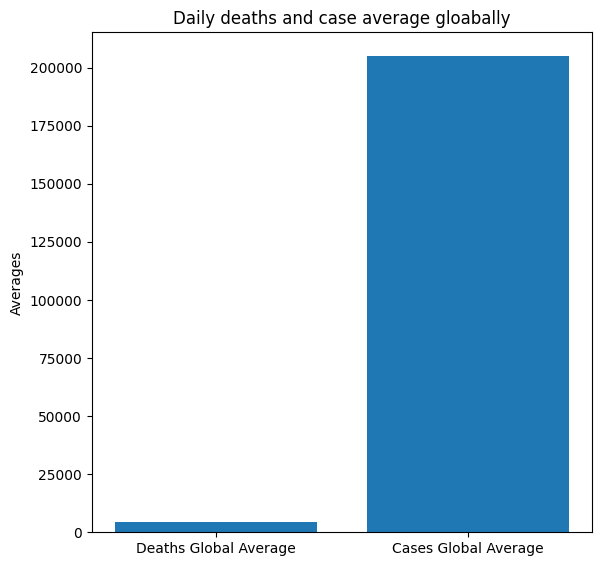

In [23]:
import matplotlib.pyplot as plt
x = ['Deaths Global Average','Cases Global Average']
y = [df_gloabl_deaths_avg,df_gloabl_cases_avg]
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_ylabel('Averages')
ax.set_title('Daily deaths and case average gloabally')
ax.bar(x,y)
plt.show()


**What is the daily infection and death rate by country?**

In [24]:
# Aggregation by day and calculation of the daily average of cases.
gc = df.groupby(['year','month','day']).agg(TC=('cases','mean')).reset_index()
gc.head()

,year,month,day,TC
0,2019,12,31,0.402985
1,2020,1,1,0.000000
2,2020,1,2,0.000000
3,2020,1,3,0.253731
4,2020,1,4,0.000000


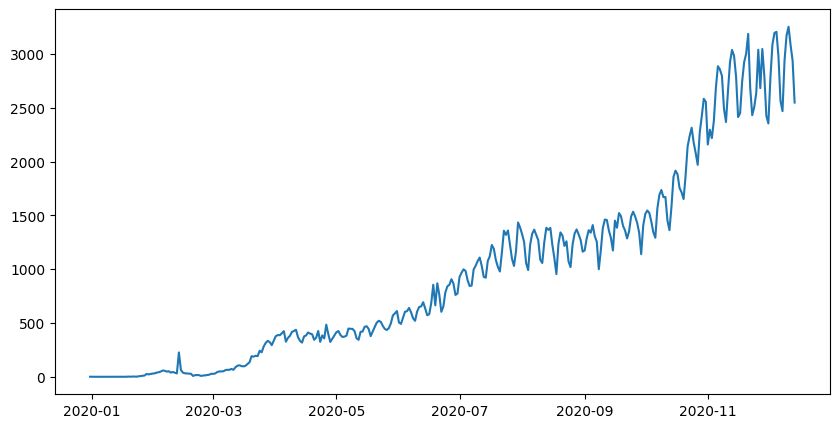

In [25]:
gc = gc.sort_values(['year','month','day'])
from datetime import date
for i, row in gc.iterrows():
    d = date(gc.at[i,'year'],gc.at[i,'month'],gc.at[i,'day'])
    gc.at[i,'date'] = d
gc = gc.sort_values('date')
plt.figure(figsize=(10,5))
plt.xlim=(0)
plt.plot(gc['date'],gc['TC'])



**What is the total number of infections and deaths per month worldwide?**

In [26]:
avg_by_country = df.groupby('country')[['deaths','cases']].agg([sum]).sort_values(('deaths','sum'),ascending=False)
avg_by_country.head()

<ipython-input-26-a01f3d46202d>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  avg_by_country = df.groupby('country')[['deaths','cases']].agg([sum]).sort_values(('deaths','sum'),ascending=False)
<ipython-input-26-a01f3d46202d>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  avg_by_country = df.groupby('country')[['deaths','cases']].agg([sum]).sort_values(('deaths','sum'),ascending=False)


,deaths,cases
,sum,sum
country,,
United_States_of_America,299177,16256754
Brazil,181402,6901952
India,143355,9884100
Mexico,113953,1250044
Italy,64582,1844008


In [27]:
avg_by_country = avg_by_country / df_days
avg_by_country.head()

,deaths,cases
,sum,sum
country,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544


<Axes: xlabel='country'>

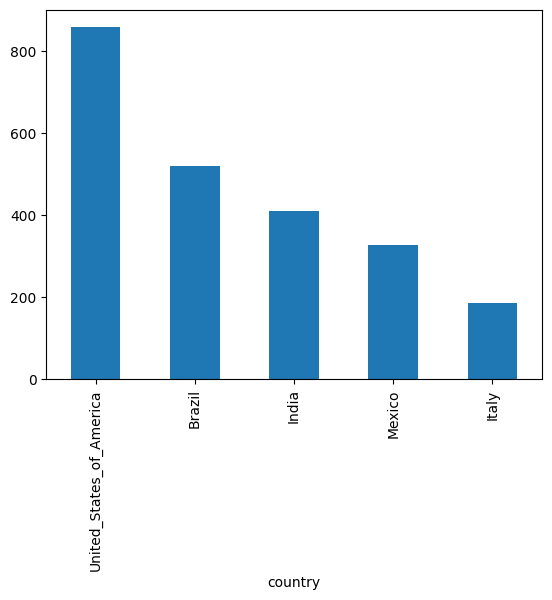

In [28]:
avg_by_country['deaths']['sum'].head(5).plot(kind='bar')

<Axes: xlabel='country'>

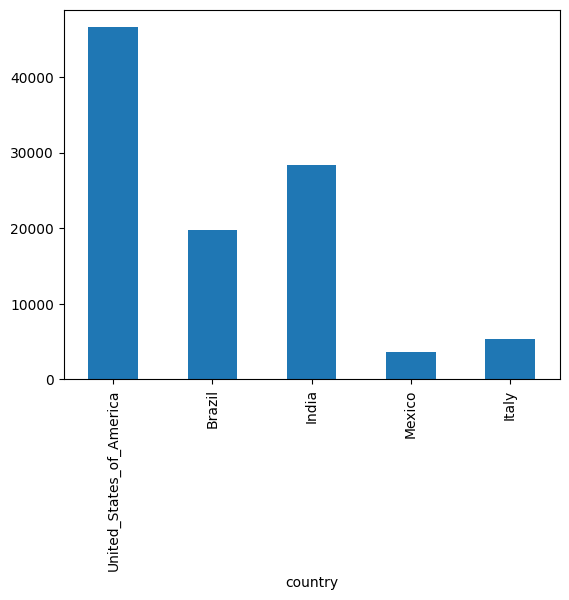

In [29]:
avg_by_country['cases']['sum'].head(5).plot(kind='bar')

**What is the total number of infections and deaths per month per country?**

In [30]:
sum_by_month = df[df['year']==2020].groupby('month')[['deaths','cases']].agg([sum]).sort_values(by=('month'))
sum_by_month.head()

<ipython-input-30-75695637cfb9>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sum_by_month = df[df['year']==2020].groupby('month')[['deaths','cases']].agg([sum]).sort_values(by=('month'))


,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710


<ipython-input-31-bb79a43afa6e>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(x)


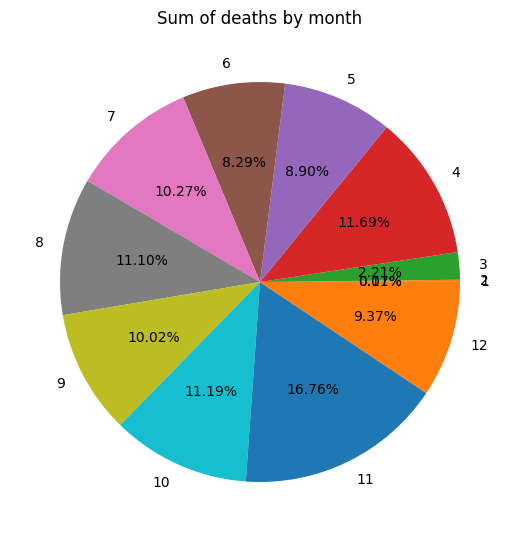

In [31]:
x = sum_by_month.index.tolist()
y1 = sum_by_month['deaths']['sum']
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of deaths by month')
ax.set_yticklabels(x)
ax.pie(y1,labels=x,autopct='%1.2f%%')
plt.show()

<ipython-input-32-7396185ce629>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(x)


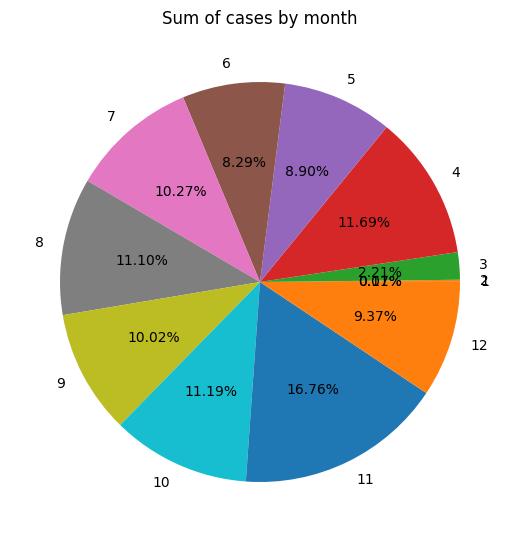

In [32]:
x = sum_by_month.index.tolist()
y2 = sum_by_month['cases']['sum']
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([.1,.1,1,1])
ax.set_title('Sum of cases by month')
ax.set_yticklabels(x)
ax.pie(y1,labels=x,autopct='%1.2f%%')
plt.show()

**What are the top five countries in terms of the number of deaths and infections?**

In [34]:
sum_by_month_country = df.groupby(['country','month'])[['deaths','cases']].agg([sum]).sort_index()
sum_by_month_country.head()

<ipython-input-34-de6bfa64c634>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sum_by_month_country = df.groupby(['country','month'])[['deaths','cases']].agg([sum]).sort_index()
<ipython-input-34-de6bfa64c634>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sum_by_month_country = df.groupby(['country','month'])[['deaths','cases']].agg([sum]).sort_index()


deaths  cases
                     sum    sum
country     month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576

In [35]:
sum_by_month_country.loc[['China','Italy']]

deaths   cases
                 sum     sum
country month               
China   1        213    9687
        2       2624   69641
        3        472    2886
        4       1328    1703
        5          1     184
        6          3     652
        7         18    2709
        8         63    2406
        9         17     633
        10         0     771
        11         0     515
        12         0     234
Italy   1          0       3
        2         21     885
        3      11570  100851
        4      16091  101852
        5       5658   29073
        6       1466    8068
        7        388    6722
        8        345   21060
        9        398   44793
        10      2446  334663
        11     16583  937504
        12      9616  258534